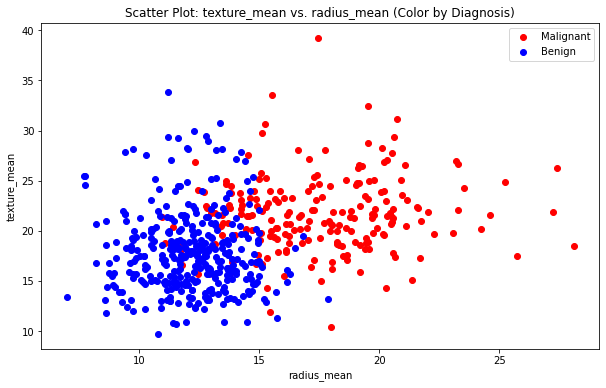

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import data from prof's repository
data = pd.read_csv("/home/pers/allouche/PHY2446M/Data/class_data.csv")
df = pd.DataFrame(data)

df = df.drop(columns = ['id', 'Unnamed: 32'])
M = df.loc[df['diagnosis']=='M', : ] 
B = df.loc[df['diagnosis']=='B', : ]

# Create a 2D scatter plot with color representing predicted salary
plt.figure(figsize=(10, 6))

# Scatter plot for Malignant (M) data
scatter_M = plt.scatter(M['radius_mean'], M['texture_mean'], c='red', label='Malignant')

# Scatter plot for Benign (B) data
scatter_B = plt.scatter(B['radius_mean'], B['texture_mean'], c='blue', label='Benign')

plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Scatter Plot: texture_mean vs. radius_mean (Color by Diagnosis)')
plt.legend()
plt.show()

y = df['diagnosis'].map({'M':0, 'B':1}) # mapping M=>0 and B=>1

x_data = df.drop(columns = ['diagnosis'])
# Normalization
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the feature data
x_data_normalized = scaler.fit_transform(x_data)

# x_data_normalized is now a numpy array, you can convert it back to a DataFrame if needed
x_data_normalized_df = pd.DataFrame(x_data_normalized, columns=x_data.columns)

In [21]:
%%capture --no-stdout
# Train Test Split using test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_data_normalized_df, y, test_size=0.3)


In [22]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (398, 30)
Test set: (171, 30)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
%%capture --no-stdout
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9849246231155779
test score: 0.9590643274853801


In [25]:
%%capture --no-stdout
# Assuming you have X_train, X_test, y_train, y_test defined

score = pd.DataFrame(columns=['n_neighbors', 'train_score', 'test_score'])

for k in range(2, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Calculate train and test scores
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)

    # Append the results to the 'score' DataFrame
    score = score.append({'n_neighbors': k, 'train_score': tr, 'test_score': te}, ignore_index=True)

In [26]:
print(score)

    n_neighbors  train_score  test_score
0           2.0     0.979899    0.935673
1           3.0     0.984925    0.959064
2           4.0     0.979899    0.953216
3           5.0     0.969849    0.964912
4           6.0     0.977387    0.959064
5           7.0     0.969849    0.970760
6           8.0     0.972362    0.970760
7           9.0     0.967337    0.970760
8          10.0     0.972362    0.970760
9          11.0     0.969849    0.970760
10         12.0     0.967337    0.970760
11         13.0     0.967337    0.959064
12         14.0     0.967337    0.970760


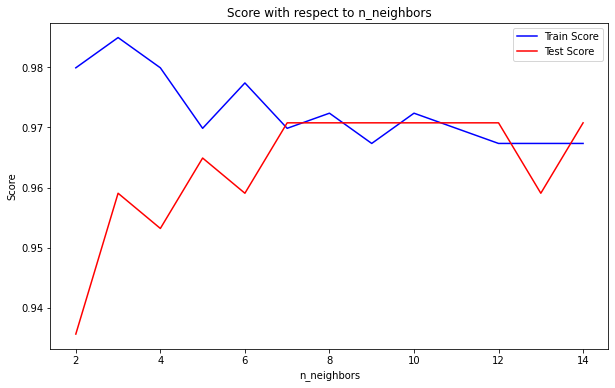

In [27]:
plt.figure(figsize=(10, 6))
plt.title('Score with respect to n_neighbors')
plt.plot(score['n_neighbors'], score['train_score'], label='Train Score', c='blue')
plt.plot(score['n_neighbors'], score['test_score'], label='Test Score', c='red')

plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

It appears that the best n_neighbor value is 7 (as I have not written a direct comparaison function the cell above has to be run before continuing to the next cell)

In [30]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

def prediction(model, x_data_normalized_df):
    # Assume that x_data_normalized_df is a DataFrame with the same structure as X_train
    # If the column order is different, you may need to reorder the columns.
    
    # Use the scaler previously fitted on the training data to transform the input data
    X = scaler.transform(x_data_normalized_df)
    
    # Reshape to 2D array
    X_reshaped = np.array(X).reshape(1, -1)
    
    return model.predict(X_reshaped)

# Generate a random row for a hypothetical patient
x_random_patient = pd.DataFrame(np.random.randn(1, len(X_train.columns)), columns=X_train.columns)

# Use the prediction function
predicted_diagnosis = prediction(model, x_random_patient)

# Display the random patient and the predicted diagnosis
print("Random Patient:")
print(x_random_patient)
print("\nPredicted Diagnosis:")
print(predicted_diagnosis)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f17f1a741f0>
Traceback (most recent call last):
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Random Patient:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      2.27234     -1.341367        0.170913  -0.712762         1.309063   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.006792       -1.604394            -0.132532       0.923551   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.09304  ...      0.783406      -0.841706        -0.632413   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.732264          1.852464          -0.701507        -0.476373   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0             -0.049393        0.236451                -0.357951  

[1 rows x 30 columns]

Predicted Diagnosis:
[1]


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f17f1926280>
Traceback (most recent call last):
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/var/lib/jupyterhub/venvs/py3.9/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


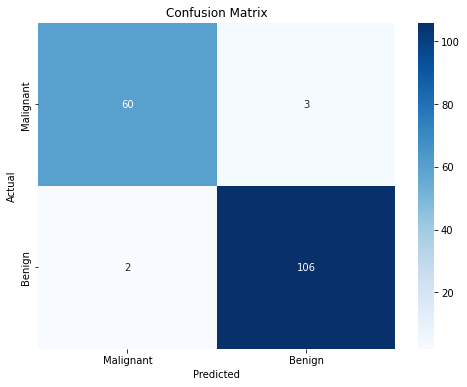

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
